In [7]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense , Conv2D, MaxPool2D, Flatten, Dropout

In [8]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [9]:
def plot_image(i):
  plt.imshow(X_train[i],cmap='binary')
  plt.title("THE BELLOW IMAGE IS OF DIGIT: "+str(y_train[i]))
  plt.show()

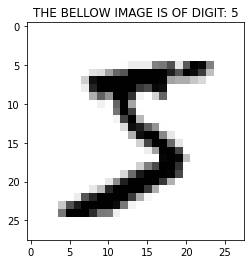

In [10]:
for i in range(1):
  plot_image(i)

In [11]:
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype (np. float32)/255

X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3) , activation='relu'))
model.add(MaxPool2D((2,2))) 

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10, activation="softmax"))

In [14]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [15]:
model.compile(optimizer='adam', loss= tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [16]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_acc', min_delta=0.01, patience=4, verbose=1 )
mc = ModelCheckpoint("./bestmodel.h5", monitor='val_acc', verbose=1, save_best_only=True)
cb=[es,mc]

In [12]:
history = model.fit(X_train,y_train,epochs=50, validation_split=0.3, callbacks = cb)

Epoch 1/50
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0389 - accuracy: 0.9878 - val_loss: 0.0468 - val_accuracy: 0.9859
Epoch 2/50
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0332 - accuracy: 0.9895 - val_loss: 0.0425 - val_accuracy: 0.9874
Epoch 3/50
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0284 - accuracy: 0.9905 - val_loss: 0.0464 - val_accuracy: 0.9867
Epoch 4/50
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0249 - accuracy: 0.9919 - val_loss: 0.0424 - val_accuracy: 0.9881
Epoch 5/50
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0224 - accuracy: 0.9927 - val_loss: 0.0413 - val_accuracy: 0.9879
Epoch 6/50
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0188 - accuracy: 0.9939 - val_loss: 0.0377 - val_accuracy: 0.9887
Epoch 7/50
1313/1313 [==============================] - 17s 13ms/step - loss: 0.0168 - accuracy: 0.9947 - val_loss: 0.0424 -

Epoch 19/50
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0082 - accuracy: 0.9973 - val_loss: 0.0521 - val_accuracy: 0.9891
Epoch 20/50
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0081 - accuracy: 0.9972 - val_loss: 0.0503 - val_accuracy: 0.9895
Epoch 21/50
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0070 - accuracy: 0.9975 - val_loss: 0.0602 - val_accuracy: 0.9884
Epoch 22/50
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0066 - accuracy: 0.9977 - val_loss: 0.0546 - val_accuracy: 0.9898
Epoch 23/50
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0061 - accuracy: 0.9979 - val_loss: 0.0508 - val_accuracy: 0.9903
Epoch 24/50
1313/1313 [==============================] - 104s 79ms/step - loss: 0.0078 - accuracy: 0.9975 - val_loss: 0.0566 - val_accuracy: 0.9893
Epoch 25/50
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0077 - accuracy: 0.9971 - val_loss: 

Epoch 37/50
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0058 - accuracy: 0.9980 - val_loss: 0.0622 - val_accuracy: 0.9896
Epoch 38/50
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0053 - accuracy: 0.9981 - val_loss: 0.0663 - val_accuracy: 0.9884
Epoch 39/50
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0051 - accuracy: 0.9983 - val_loss: 0.0682 - val_accuracy: 0.9897
Epoch 40/50
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.0687 - val_accuracy: 0.9897
Epoch 41/50
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0053 - accuracy: 0.9983 - val_loss: 0.0680 - val_accuracy: 0.9896
Epoch 42/50
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.0696 - val_accuracy: 0.9898
Epoch 43/50
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0049 - accuracy: 0.9983 - val_loss: 0

In [14]:
model.save("./bestmodel.h5")

In [17]:
saved_model = tf.keras.models.load_model("./bestmodel.h5")

In [18]:
score = saved_model.evaluate(X_test,y_test)

print("The Model Accuracy is: ",score[1])

2022-04-04 22:51:04.106556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 6ms/step - loss: 0.0559 - accuracy: 0.9918
The Model Accuracy is:  0.99180006980896


In [28]:
print(saved_model.predict(X_train))


2022-04-04 22:53:49.567140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[[9.0647411e-34 2.4593463e-27 2.6780567e-30 ... 2.8226434e-21
  1.2453626e-21 2.2545022e-19]
 [1.0000000e+00 5.6862783e-33 1.5100914e-14 ... 1.8396000e-22
  1.2764624e-18 7.4792027e-15]
 [7.3915458e-35 3.6279828e-09 7.7167917e-19 ... 1.4379184e-11
  4.0170091e-17 5.6090695e-15]
 ...
 [1.1609465e-29 1.8710704e-28 1.4957513e-38 ... 9.1461407e-32
  7.6540510e-22 3.6290151e-14]
 [1.5318076e-12 2.3016501e-20 5.4324251e-21 ... 5.3333111e-29
  9.1398000e-16 2.6706239e-24]
 [2.3051303e-15 6.1324856e-24 7.9730385e-16 ... 1.5659466e-20
  1.0000000e+00 3.8964153e-12]]
[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]

In [13]:
from PIL import Image
import cv2
import numpy as np
from keras.models import load_model

model = load_model ("bestmodel.h5")
LABELS = {  0: "Zero", 1: "One",
            2: "Two", 3:"Three",
            4: "Four", 5:"Five",
            6: "Six", 7: "Seven",
            8: "Eight", 9: "Nine"}

def predict(path_image):
    data = []
    im = cv2.imread(path_image)
    im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    ret,thre = cv2.threshold(im_gray,220,255,cv2.THRESH_BINARY)
    im_not = cv2.bitwise_not(thre)
    contours,hierachy = cv2.findContours(im_not,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        (x,y,w,h) = cv2.boundingRect(cnt)
        roi = im_not[y:y+h,x:x+w]
        if (roi.shape[0]<28) and (roi.shape[1]<28):
            pass
        else:
            roi_resize = cv2.resize(roi,(22,22),interpolation = cv2.INTER_LINEAR)
            roi_padding = np.pad(roi_resize,(3,3),'constant',constant_values=(0,0))
            kernel = np.array([[0,1]],np.uint8)
            roi_dila = cv2.dilate(roi_padding,kernel)
            roi_reshape = roi_dila.reshape((1,28,28,1)).astype(np.float32)/255
            predict = model.predict(roi_reshape) 
            cv2.putText(im,str(predict.astype("int32")),(int((x)),int((y))),1,cv2.FONT_HERSHEY_COMPLEX,(0,255,0),1,cv2.LINE_AA)
            data.append([x,y,str(predict.astype("int32"))])
    answer_str=[]
    for i in data:
        answer_str.append(str(i[-1]))
    return (''.join(answer_str))
a=predict('3.jpg')
print(a)



[[0 0 0 0 0 0 0 0 0 0]]


2022-04-04 22:35:09.855187: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
